In [1]:
import corner
import matplotlib.pyplot as plt
import numpy as np
import yaml
import matplotlib
import h5py

import sys

sys.path.append("../lib/")
import matplotlib.pyplot as plt
from figparams import *

plt.rcParams.update(rc_params)
from utils import *


In [2]:
def corn(
    result,
    color,
    label=None,
    true=None,
    fig=None,
    alpha=1,
    line_s="-",
    ht="step",
    linewidth=1,
    ctrue="k",
):
    from matplotlib.ticker import MaxNLocator

    # Identify fixed parameters
    if not fig:
        # Create figure with subplots (size x size grid)
        fig = plt.figure(figsize=(10, 10))
    corner.corner(
        result,
        labels=label,
        fig=fig,
        color=color,
        alpha=alpha,
        labelpad=0.35,
        label_kwargs={"fontsize": 14},
        levels=[0.9545],
        hist_kwargs={
            "density": True,
            "histtype": ht,
            "linestyle": line_s,
            "linewidth": 1,
            "alpha": alpha,
        },
        contour_kwargs={"linewidths": 1},
        plot_datapoints=False,
        plot_contours=True,
        plot_density=False,
        fill_contours=False,
        smooth=True,
    )

    corner.overplot_points
    ndim = result.shape[1]
    axes = np.array(fig.axes).reshape((ndim, ndim))

    # Loop over the diagonal
    for i in range(ndim):
        ax = axes[i, i]
        ax.axvline(true[i], color=ctrue, linestyle="--", linewidth=1)

    # Loop over the histograms (off-diagonal plots)
    for yi in range(ndim):
        for xi in range(yi):
            ax = axes[yi, xi]
            ax.axvline(true[xi], color=ctrue, linestyle="--", linewidth=1)
            ax.axhline(true[yi], color=ctrue, linestyle="--", linewidth=1)

    # Set 3 ticks only for border axes with no overlap
    for i in range(ndim):
        for j in range(ndim):
            if i >= j:  # Only consider lower triangle + diagonal
                ax = axes[i, j]

                # Bottom border (last row) - set x-ticks
                if i == ndim - 1:
                    ax.xaxis.set_major_locator(MaxNLocator(nbins=3, prune="both"))
                    ax.tick_params(axis="x", labelsize=12, pad=1.5)
                else:
                    ax.set_xticks([])

                # Left border (first column) - set y-ticks
                if j == 0:
                    ax.yaxis.set_major_locator(MaxNLocator(nbins=3, prune="both"))
                    ax.tick_params(axis="y", labelsize=12, pad=1.5)
                else:
                    ax.set_yticks([])

    # Adjust spacing between subplots to prevent overlap
    plt.subplots_adjust(hspace=0.1, wspace=0.1)

    return fig

In [3]:
mode = "cyclo"
label_plot = [
    r"$\alpha$",
    r"$\mathcal{A}$",
    r"$\log_{10}(\frac{f_{\rm knee}}{{\rm Hz}})$",
    r"$\log_{10}(\frac{f_{\rm 1}}{{\rm Hz}})$",
    r"$\log_{10}(\frac{f_{\rm 2}}{{\rm Hz}})$",
    r"$\sin \beta$",
    r"$\lambda [{\rm rad}]$",
    r"$\sin \psi$",
    r"$\sigma_1^2 [{\rm rad}^2]$",
    r"$\sigma_2^2 [{\rm rad}^2]$",
]
#        '$\mathcal{P}_{\mathrm{tm}}$', '$\mathcal{P}_{\mathrm{oms}}$']

['final_ks_statistic', 'final_p_value', 'glasflow_version', 'history', 'information', 'insertion_indices', 'likelihood_evaluation_time', 'logL_birth', 'log_evidence', 'log_evidence_error', 'log_posterior_weights', 'nested_samples', 'population_time', 'posterior_samples', 'sampling_time', 'seed', 'total_likelihood_evaluations', 'training_time', 'version']
('alpha', 'amp', 'fknee', 'fr1', 'fr2', 'lat', 'long', 'psi', 's1', 's2')
['final_ks_statistic', 'final_p_value', 'glasflow_version', 'history', 'information', 'insertion_indices', 'likelihood_evaluation_time', 'logL_birth', 'log_evidence', 'log_evidence_error', 'log_posterior_weights', 'nested_samples', 'population_time', 'posterior_samples', 'sampling_time', 'seed', 'total_likelihood_evaluations', 'training_time', 'version']
['final_ks_statistic', 'final_p_value', 'glasflow_version', 'history', 'information', 'insertion_indices', 'likelihood_evaluation_time', 'logL_birth', 'log_evidence', 'log_evidence_error', 'log_posterior_weights'

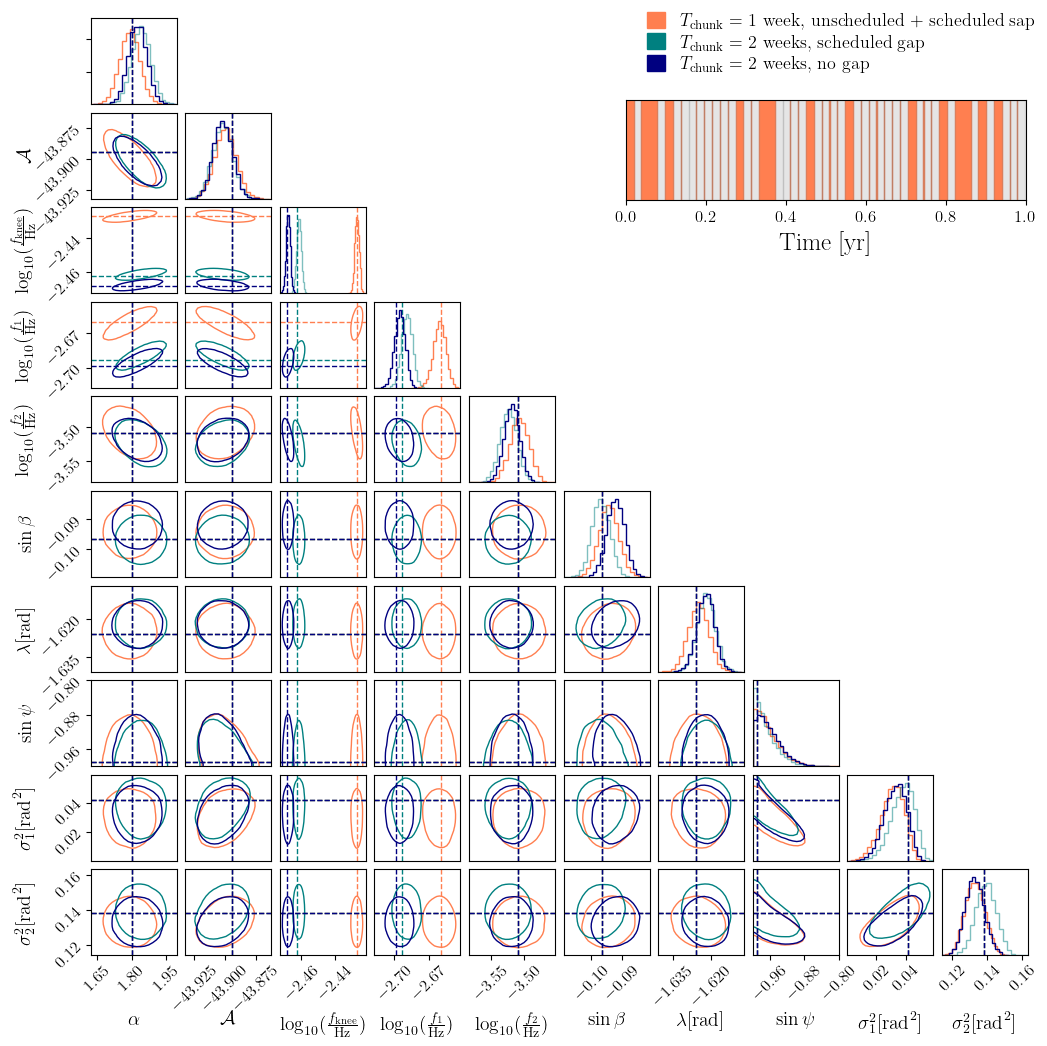

In [4]:
colors_corn = [
    "teal",
    "coral",
    "#000080",
]  # "#D4A017"]  # '#B497BD']

with h5py.File(
    "../data/first_year_gu/pack_2/nessai/Gamma/cyclo/result.hdf5",
    "r",
) as f:
    print(list(f.keys()))  # Lists top-level groups or datasets

    # Example: access a dataset
    posterior = f["posterior_samples"][:]

source = f"../data/first_year_gu/pack_2/nessai/Gamma/cyclo/pe_pack2_{mode}.yaml"
# extract true of source
# Read the YAML file
year = 31536000
fknee = -0.27 * np.log10(0.6904109589041096) - 2.47
f1 = -0.25 * np.log10(0.6904109589041096) - 2.70
true = [
    1.8,
    -43.894309514866350,
    fknee,
    f1,
    -3.5086383061657274,
    -0.09664565,
    -1.6259238,
    -0.9900146151015816,
    0.04156049812924856,
    0.13842963137295858,
]  # , 2.4, 7.9]


with open(source, "r") as file:
    sources = yaml.safe_load(file)["sources"]

# Get the dtype and field names
dtype = posterior.dtype

label = dtype.names[: len(true)]  # first 7 parameter names
print(label)
# Stack values into a 2D array (n_samples, n_params)
samples = np.vstack([posterior[name] for name in label]).T

samples_nested = samples  # - true_as_samples

fig = corn(
    samples_nested,
    colors_corn[1],
    label=label_plot,
    true=true,
    alpha=1,
    line_s="-",
    ht="step",
    linewidth=0.5,
    ctrue=colors_corn[1],
)

#################################################################################
with h5py.File(
    "../data/first_year_gs/pack_24/nessai/Gamma/cyclo/result.hdf5",
    "r",
) as g:
    print(list(g.keys()))  # Lists top-level groups or datasets
    # Example: access a dataset
    posterior = g["posterior_samples"][:]


# Get the dtype and field names
dtype = posterior.dtype
label = dtype.names[: len(true)]  # first 7 parameter names
# Stack values into a 2D array (n_samples, n_params)
samples = np.vstack([posterior[name] for name in label]).T
# subtract the true values
true_as_samples = np.array(true)
# Reshape the true values to match the shape of samples
true_as_samples = np.tile(true_as_samples, (samples.shape[0], 1))
samples_nested = samples  # - true_as_samples

fknee = -0.27 * np.log10(29635200.0 / year) - 2.47
f1 = -0.25 * np.log10(29635200.0 / year) - 2.70
true = [
    1.8,
    -43.894309514866350,
    fknee,
    f1,
    -3.5086383061657274,
    -0.09664565,
    -1.6259238,
    -0.9900146151015816,
    0.04156049812924856,
    0.13842963137295858,
]  # , 2.4, 7.9]


corn(
    samples_nested,
    colors_corn[0],
    true=true,
    label=label_plot,
    fig=fig,
    alpha=0.5,
    line_s="-",
    ht="step",
    linewidth=0.5,
    ctrue=colors_corn[0],
)

#################################################################################
with h5py.File(
    "../data/first_year_twoweeks/pack_24/nessai/Gamma/cyclo/result.hdf5",
    "r",
) as g:
    print(list(g.keys()))  # Lists top-level groups or datasets
    # Example: access a dataset
    posterior = g["posterior_samples"][:]

year = 31536000
fknee = -0.27 * np.log10(31104000.0 / year) - 2.47
f1 = -0.25 * np.log10(31104000.0 / year) - 2.70
true = [
    1.8,
    -43.894309514866350,
    fknee,
    f1,
    -3.5086383061657274,
    -0.09664565,
    -1.6259238,
    -0.9900146151015816,
    0.04156049812924856,
    0.13842963137295858,
]  # , 2.4, 7.9]
# Stack values into a 2D array (n_samples, n_params)
samples = np.vstack([posterior[name] for name in label]).T
# subtract the true values

samples_nested = samples  # - true_as_samples

corn(
    samples_nested,
    colors_corn[2],
    true=true,
    label=label_plot,
    fig=fig,
    alpha=1,
    line_s="-",
    ht="step",
    linewidth=0.5,
    ctrue=colors_corn[2],
)

#################################################################################
handles = [
    matplotlib.patches.Patch(
        color=colors_corn[1],
        label="$T_{\\rm chunk} = 1$ week, unscheduled + scheduled sap",
    ),
    matplotlib.patches.Patch(
        color=colors_corn[0], label="$T_{\\rm chunk} = 2$ weeks, scheduled gap"
    ),
    matplotlib.patches.Patch(
        color=colors_corn[2], label="$T_{\\rm chunk} = 2$ weeks, no gap"
    ),
]
# matplotlib.patches.Patch(color='green', label='2 weeks, no gap'),]
fig.legend(
    handles=handles,
    loc="upper right",
    frameon=False,
    handlelength=1,
    handleheight=1,
    borderpad=0.2,
    labelspacing=0.2,
    fontsize=13,
)

# === after your main corner plots and before fig.savefig(...) ===

# Load time intervals
t1, t2 = np.loadtxt("../data/first_year_gu/pack_2/time_interval.txt")
total_time = t2[-1]
year = 31536000

# Identify gaps
gap_starts, gap_ends = [], []
if t1[0] > 0:
    gap_starts.append(0)
    gap_ends.append(t1[0])
for i in range(len(t1) - 1):
    if t2[i] < t1[i + 1]:
        gap_starts.append(t2[i])
        gap_ends.append(t1[i + 1])
if t2[-1] < total_time:
    gap_starts.append(t2[-1])
    gap_ends.append(total_time)

# Add inset axes to the *corner plot figure*
axinset = fig.add_axes([0.58, 0.8, 0.4, 0.1])  # [left, bottom, width, height]

# Plot gaps
for start, end in zip(gap_starts, gap_ends):
    axinset.axvspan(start / year, end / year, alpha=1, color=colors_corn[1])

# Plot data segments
for i, (start, end) in enumerate(zip(t1, t2)):
    axinset.axvspan(start / year, end / year, alpha=0.2, color="grey")

# Formatting inset
axinset.set_xlim(0, total_time / year)
axinset.set_ylim(-0.5, 0.5)
axinset.set_yticks([])
axinset.set_xlabel("Time [yr]")
axinset.set_xticks(
    np.arange(0, (total_time / year) + 0.2, 0.2),
)
axinset.tick_params(axis="x", labelsize=12)

fig.align_labels()
fig.savefig(f"../plots/Figure7.pdf", dpi=300, bbox_inches="tight")